In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/E-Commerce Churn Data.csv')

In [ ]:
segmentation_features = ['OrderCount', 'CashbackAmount', 'OrderAmountHikeFromlastYear']


In [ ]:
for feature in segmentation_features:
    data[feature] = data[feature].fillna(data[feature].median())


In [ ]:
segmentation_data = data[segmentation_features] #No need for dropna() now
scaler = StandardScaler()
scaled_data = scaler.fit_transform(segmentation_data)

In [ ]:
# Finding the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

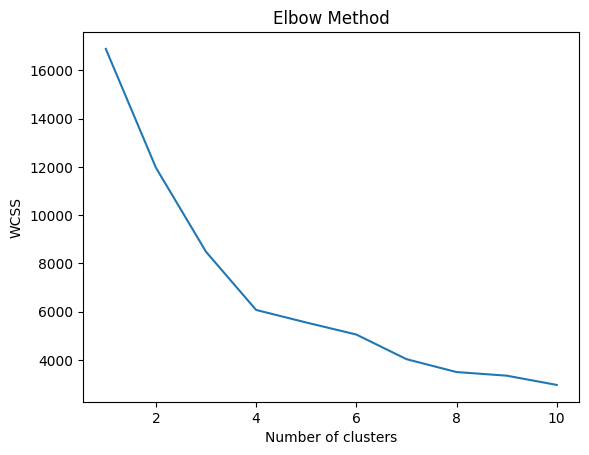

In [ ]:
# Plotting the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Applying KMeans with the optimal number of clusters (let's assume 4 for now)
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

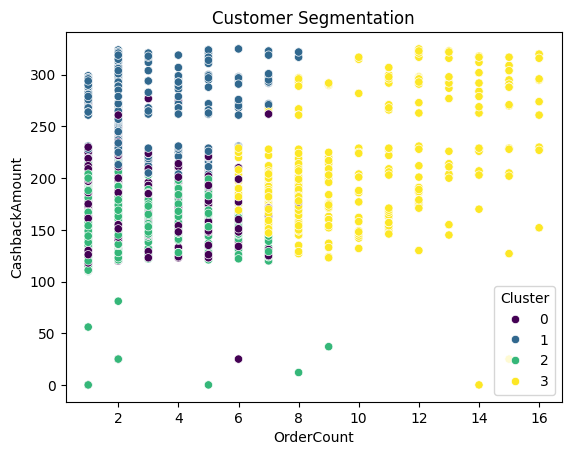

In [ ]:
# Visualizing the clusters
sns.scatterplot(x=data['OrderCount'], y=data['CashbackAmount'], hue=data['Cluster'], palette='viridis')
plt.title('Customer Segmentation')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Preprocessing
# Handling missing values
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [ ]:
# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'MaritalStatus', 'PreferedOrderCat']
for col in categorical_cols:
    data_imputed[col] = label_encoder.fit_transform(data_imputed[col])

In [ ]:
# Splitting features and target
X = data_imputed.drop(['Churn', 'CustomerID'], axis=1)
y = data_imputed['Churn']


In [ ]:
# ----> Convert y to numeric type <----
y = pd.to_numeric(y, errors='coerce').astype(int)

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Building the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Making predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9674363528715216
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1414
           1       0.97      0.83      0.89       275

    accuracy                           0.97      1689
   macro avg       0.97      0.91      0.94      1689
weighted avg       0.97      0.97      0.97      1689

Confusion Matrix:
 [[1407    7]
 [  48  227]]


In [ ]:
# Step 4: Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
# Best model from tuning
best_model = grid_search.best_estimator_

In [ ]:
# Re-evaluation with the best model
y_pred_best = best_model.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Best Model Accuracy: 0.9668442865600947
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1414
           1       0.96      0.83      0.89       275

    accuracy                           0.97      1689
   macro avg       0.96      0.91      0.94      1689
weighted avg       0.97      0.97      0.97      1689



In [ ]:
# Feature Importance
importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)


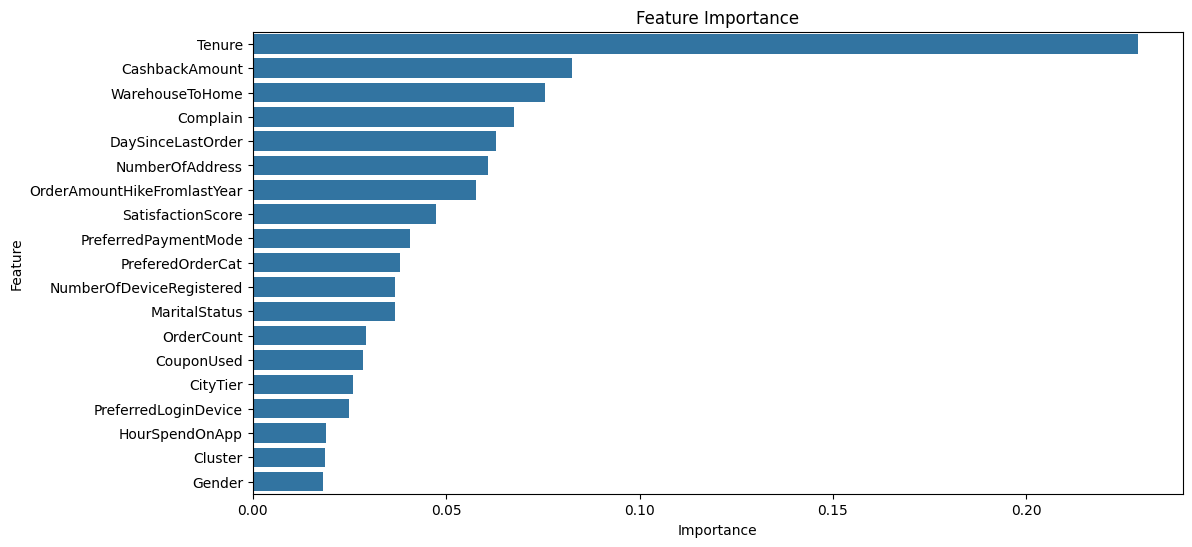

Feature Importance:
                         Feature  Importance
0                        Tenure    0.228953
17               CashbackAmount    0.082527
3               WarehouseToHome    0.075486
12                     Complain    0.067456
16            DaySinceLastOrder    0.062812
11              NumberOfAddress    0.060891
13  OrderAmountHikeFromlastYear    0.057784
9             SatisfactionScore    0.047378
4          PreferredPaymentMode    0.040630
8              PreferedOrderCat    0.038031
7      NumberOfDeviceRegistered    0.036777
10                MaritalStatus    0.036679
15                   OrderCount    0.029313
14                   CouponUsed    0.028501
2                      CityTier    0.025935
1          PreferredLoginDevice    0.024824
6                HourSpendOnApp    0.019035
18                      Cluster    0.018758
5                        Gender    0.018230


In [ ]:
# Display feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

print("Feature Importance:\n", feature_importance_df)